In [1]:
%pylab inline

/Users/jcolucci/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import string

In [3]:
#Read in Apogee data
df=pd.read_csv('MyTable_1_morley.csv')

In [4]:
df[:10]
#df=df[df.Column1 != 'null']
#df=df[df.Column2 != 'null']


,apogee_id,target_id,ra,dec,glon,glat,vhelio_avg,vscatter,teff,logg,...,DDO51,wash_ddo51_giant_flag,wash_ddo51_star_flag,irac_3_6,irac_4_5,irac_5_8,irac_8_0,sfd_ebv,Column1,Column2
0,2M00475480+2055312,1.calibration.2M00475480+2055312,11.978455,20.925344,121.825575,-41.938749,0.834127,0.0,6229.0,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.032552,null,null
1,2M01081597+5455148,1.calibration.2M01081597+5455148,17.068312,54.920341,125.372343,-7.871484,-96.144800,0.0,5134.2,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.418305,null,null
2,2M01094391+3537137,1.calibration.2M01094391+3537137,17.433016,35.620556,127.107561,-27.102719,-0.005711,0.0,3859.2,1.154406,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.058886,null,null
3,2M01101875+4204533,1.calibration.2M01101875+4204533,17.578087,42.081474,126.672978,-20.653017,-13.564500,0.0,5773.7,3.577268,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.077669,null,null
4,2M01484160+3241239,1.calibration.2M01484160+3241239,27.173180,32.690208,136.647587,-28.651969,-23.623400,0.0,5751.9,3.876734,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.044743,null,null
5,2M02264972+4457464,1.calibration.2M02264972+4457464,36.707241,44.962921,140.134614,-14.698783,-147.728000,0.0,6410.3,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.092392,ALPHAFE_WARN,SUSPECT_BROAD_LINES
6,2M02360498+0653140,1.calibration.2M02360498+0653140,39.020393,6.886874,163.401989,-47.593278,25.717900,0.0,4727.5,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.115141,VMICRO_WARN,null
7,2M03183846+7216305,1.calibration.2M03183846+7216305,49.660412,72.275124,133.700518,12.555295,27.953900,0.0,5143.2,3.387044,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.649127,VMICRO_WARN,null
8,2M03385721+4232178,1.calibration.2M03385721+4232178,54.738270,42.538277,152.934455,-10.368127,-40.017400,0.0,5702.7,3.842756,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.273106,VMICRO_WARN,null
9,2M03470204+4125397,1.calibration.2M03470204+4125397,56.758804,41.427238,154.832793,-10.318776,52.751200,0.0,4735.2,-9999.000000,...,-9999.0,-1,1,-9999.0,-9999.0,-9999.0,-9999.0,0.361122,null,null


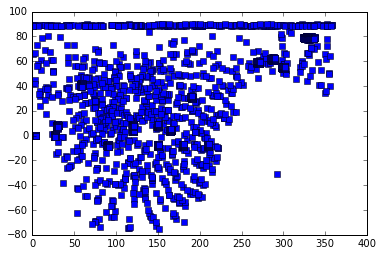

In [5]:
#plot of galactic longitude and galactic latitude
plt.plot(df.glon,df.glat,marker='s',linestyle='None')

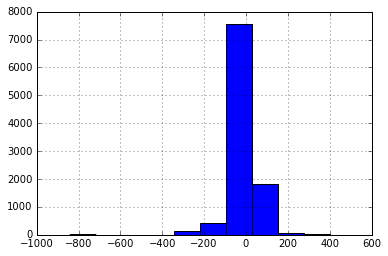

In [6]:
#check out the radial velocity distribution
df.vhelio_avg.hist()

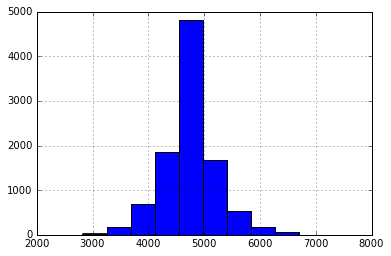

In [7]:
#check out the stellar temperatures
df.teff.hist()

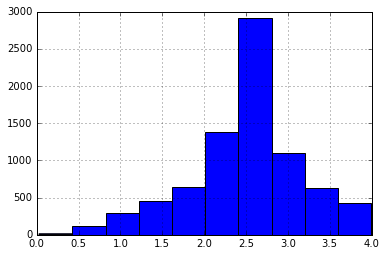

In [8]:
#Look at the gravities, get rid of missing negative values
df=df[df.logg >0]
df.logg.hist()


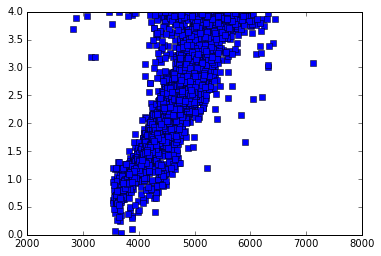

In [9]:
# temperature vs gravity
plt.plot(df.teff,df.logg,marker='s',linestyle='None')

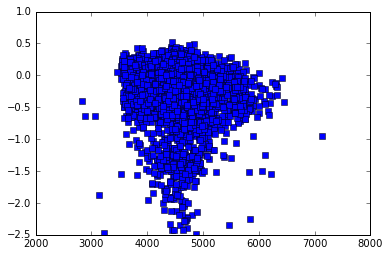

In [10]:
#temperature vs metallicity. Hotter stars perhaps more metal poor? (add a dwarf vs. giant cut?)
plt.plot(df.teff,df.m_h,marker='s',linestyle='None')

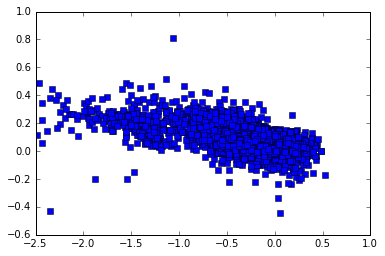

In [11]:
#alpha elements vs. metallicity
plt.plot(df.m_h,df.alpha_m,marker='s',linestyle='None')

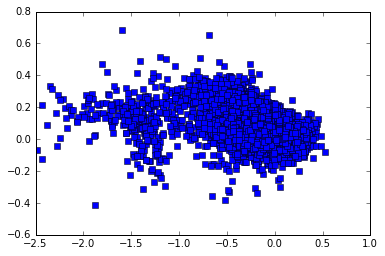

In [12]:
# Mg vs. metallicity, clean out missing negative values
df=df[(df.mg_fe < 5.) & (df.mg_fe > -5)]
plt.plot(df.m_h,df.mg_fe,marker='s',linestyle='None')

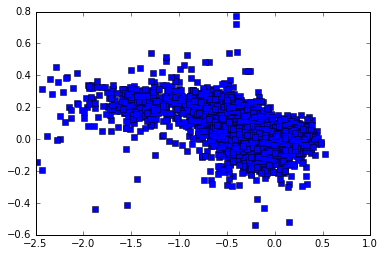

In [13]:
# Si vs. metallicity, clean out missing negative values

df=df[(df.si_fe < 5.) & (df.si_fe > -5)]
plt.plot(df.m_h,df.si_fe,marker='s',linestyle='None')

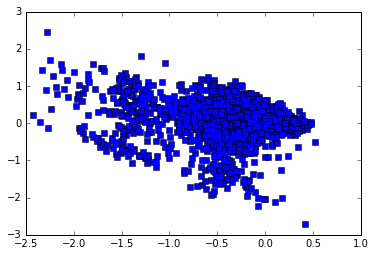

In [14]:
# Ni vs. metallicity, clean out missing negative values

df=df[(df.ni_fe < 5.) & (df.ni_fe > -5)]
plt.plot(df[df.rb_fe > -1000].m_h,df[df.rb_fe > -1000].rb_fe,marker='s',linestyle='None')

In [15]:
#create a color parameter, clean out extreme values
df['color']=df.j-df.k
df=df[df.color <1000]

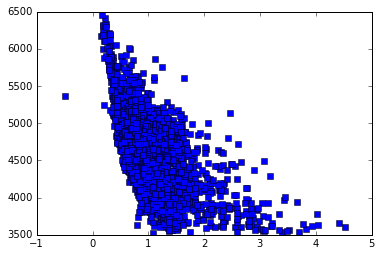

In [16]:
#color temperature plot
plt.plot(df.color,df.teff,marker='s',linestyle='None')

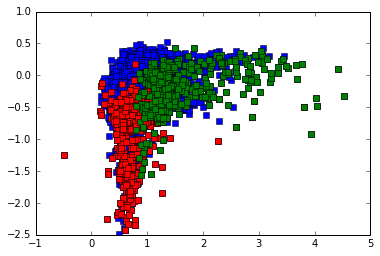

In [27]:
# Check out how the color metallicity plot behaves with alpha abundance and temperature
plt.plot(df.color,df.m_h,marker='s',linestyle='None')
plt.plot(df[df.alpha_m > 0.2].color,df[df.alpha_m > 0.2].m_h,marker='s',linestyle='None',color='r')
plt.plot(df[df.teff < 4000].color,df[df.teff < 4000].m_h,marker='s',linestyle='None',color='g')

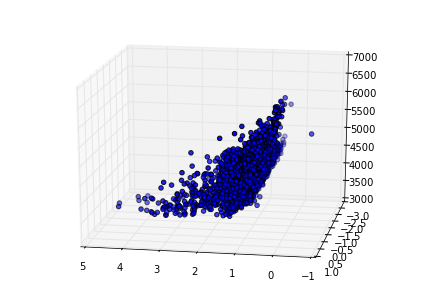

In [18]:
#check out a 3d plot of color, metallicity and temperature
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=100)
ax.scatter(df.color,df.m_h,df.teff)


In [19]:
#feature scale the values for a clustering test
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#X=df.vhelio_avg
X=df[["color","m_h","teff"]]
X = MinMaxScaler().fit_transform(X)
X

array([[ 0.27536809,  0.73558914,  0.11479278],
       [ 0.19379228,  0.79574912,  0.76945698],
       [ 0.19637883,  0.73521122,  0.76200246],
       ..., 
       [ 0.24114604,  0.78675656,  0.52462043],
       [ 0.25348189,  0.80159676,  0.48146628],
       [ 0.2522881 ,  0.70291427,  0.50704418]])

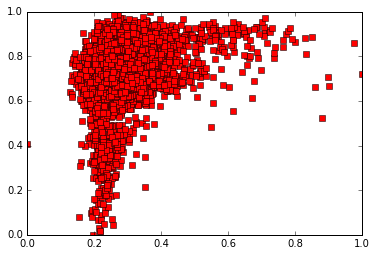

In [20]:
#scaled color and metallicity
plt.plot(X[:,0], X[:,1], color='red',linestyle='None',marker='s')

In [21]:
#get KMeans
clf=KMeans(n_clusters=3)

In [22]:
# predict clustering
pred=clf.fit_predict(X)

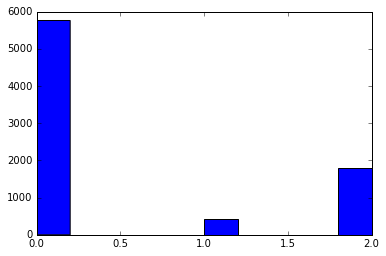

In [23]:
#results?
xx=plt.hist(pred)

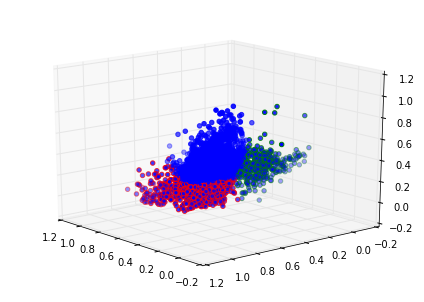

In [26]:
#Put results in a dataframe and plot
pred_df = pd.DataFrame(X,columns = ['0','1','2'])
pred_df['pred'] = pred
pred_df


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=140)
ax.scatter(pred_df[pred_df.pred==0]['0'],pred_df[pred_df.pred==0]['1'],pred_df[pred_df.pred==0]['2'],color='b')
ax.scatter(pred_df[pred_df.pred==1]['0'],pred_df[pred_df.pred==1]['1'],pred_df[pred_df.pred==1]['2'],color='g')
ax.scatter(pred_df[pred_df.pred==2]['0'],pred_df[pred_df.pred==2]['1'],pred_df[pred_df.pred==2]['2'],color='r')

In [ ]:
pred_df